In [2]:
import pandas as pd

In [171]:
import matplotlib.pyplot as plt

In [183]:
plt.rcParams['figure.figsize'] = [15, 15]

In [79]:
df1 = pd.read_csv("../data/uoft-first-year-data-2020-07-24.csv")

In [80]:
df1

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,enrollmentControls
0,USA200H1,CSUS,F,60,20,ONLSYNC,*
1,USA300H1,CSUS,S,9,7,CLASS,*
2,USA300H1,CSUS,S,51,8,ONLSYNC,*
3,USA310H1,CSUS,S,4,4,CLASS,*
4,USA310H1,CSUS,S,21,4,ONLSYNC,*
...,...,...,...,...,...,...,...
5922,WDW236H1,WDW,S,27,14,ONLSYNC,*
5923,WDW436H1,WDW,S,0,0,CLASS,*
5924,WDW436H1,WDW,S,30,27,ONLSYNC,*
5925,WDW437H1,WDW,S,4,4,CLASS,*


In [81]:
fall_year_sections = df1[df1.section.isin(["F", "Y"])]

In [82]:
fall_year_sections

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,enrollmentControls
0,USA200H1,CSUS,F,60,20,ONLSYNC,*
5,USA311H1,CSUS,F,25,15,ONLSYNC,*
6,USA312H1,CSUS,F,30,4,ONLSYNC,*
9,USA313H1,CSUS,F,15,3,ONLASYNC,*
12,USA403H1,CSUS,F,4,3,CLASS,*
...,...,...,...,...,...,...,...
5914,WDW196H1,WDW,F,13,13,ONLSYNC,1
5915,WDW199H1,WDW,F,12,5,CLASS,1
5916,WDW199H1,WDW,F,13,6,ONLSYNC,1
5917,WDW235H1,WDW,F,26,13,CLASS,2


In [85]:
sections_with_enrolment = fall_year_sections.groupby(['code', 'section']).filter(lambda section: section['actualEnrolment'].sum() > 0 and section['enrollmentCapacity'].all())

In [86]:
sections_with_enrolment['enrollmentPercentage'] = sections_with_enrolment.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'], axis=1)

In [87]:
sections_with_enrolment

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,enrollmentControls,enrollmentPercentage
0,USA200H1,CSUS,F,60,20,ONLSYNC,*,0.333333
5,USA311H1,CSUS,F,25,15,ONLSYNC,*,0.600000
6,USA312H1,CSUS,F,30,4,ONLSYNC,*,0.133333
9,USA313H1,CSUS,F,15,3,ONLASYNC,*,0.200000
12,USA403H1,CSUS,F,4,3,CLASS,*,0.750000
...,...,...,...,...,...,...,...,...
5914,WDW196H1,WDW,F,13,13,ONLSYNC,1,1.000000
5915,WDW199H1,WDW,F,12,5,CLASS,1,0.416667
5916,WDW199H1,WDW,F,13,6,ONLSYNC,1,0.461538
5917,WDW235H1,WDW,F,26,13,CLASS,2,0.500000


In [88]:
sections_with_multiple_delivery_modes = sections_with_enrolment.groupby(['code', 'section']).filter(lambda section: len(section['deliveryMode'].unique()) > 1)

In [89]:
sections_with_multiple_delivery_modes

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,enrollmentControls,enrollmentPercentage
12,USA403H1,CSUS,F,4,3,CLASS,*,0.750000
13,USA403H1,CSUS,F,4,2,ONLSYNC,*,0.500000
29,ANT199H1,ANT,F,10,5,CLASS,1,0.500000
30,ANT199H1,ANT,F,15,2,ONLSYNC,1,0.133333
40,ARH305H1,ANT,F,20,9,CLASS,*,0.450000
...,...,...,...,...,...,...,...,...
5914,WDW196H1,WDW,F,13,13,ONLSYNC,1,1.000000
5915,WDW199H1,WDW,F,12,5,CLASS,1,0.416667
5916,WDW199H1,WDW,F,13,6,ONLSYNC,1,0.461538
5917,WDW235H1,WDW,F,26,13,CLASS,2,0.500000


In [112]:
plot_by_enrollment_percentage = lambda df: df.groupby(['code', 'section']).plot(kind='bar', x='deliveryMode', y='enrollmentPercentage')

In [135]:
def group_by_delivery_mode_and_sum(df): 
    frame = df.groupby(['deliveryMode']).agg({'enrollmentCapacity': 'sum', 'actualEnrolment': 'sum'})
    frame['enrollmentPercentage'] = frame.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'] * 100, axis=1)
    return frame

In [136]:
enrollments_with_multiple_modes = group_by_delivery_mode_and_sum(sections_with_multiple_delivery_modes)

In [137]:
enrollments_with_multiple_modes

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,14550,10273,70.604811
ONLASYNC,946,798,84.355180
ONLSYNC,43410,28268,65.118636


In [138]:
all_enrollments = group_by_delivery_mode_and_sum(sections_with_enrolment)

In [139]:
all_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,15098,10599,70.201351
ONLASYNC,30532,24742,81.036290
ONLSYNC,109814,76650,69.799843


In [140]:
first_year_sections = sections_with_multiple_delivery_modes[sections_with_multiple_delivery_modes.enrollmentControls.eq('1')]

In [141]:
first_year_enrollments = group_by_delivery_mode_and_sum(first_year_sections)

In [142]:
first_year_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,1080,772,71.481481
ONLASYNC,100,100,100.000000
ONLSYNC,4108,3440,83.739046


In [143]:
priority_sections = sections_with_multiple_delivery_modes[sections_with_multiple_delivery_modes.enrollmentControls.notnull()]

In [144]:
priority_enrollments = group_by_delivery_mode_and_sum(priority_sections)

In [145]:
priority_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,8989,6509,72.410724
ONLASYNC,901,766,85.016648
ONLSYNC,28342,19057,67.239433


In [186]:
plot = lambda df: df[['enrollmentPercentage', 'actualEnrolment']].plot(secondary_y=['actualEnrolment'], kind='bar', rot=0)

<AxesSubplot:xlabel='deliveryMode'>

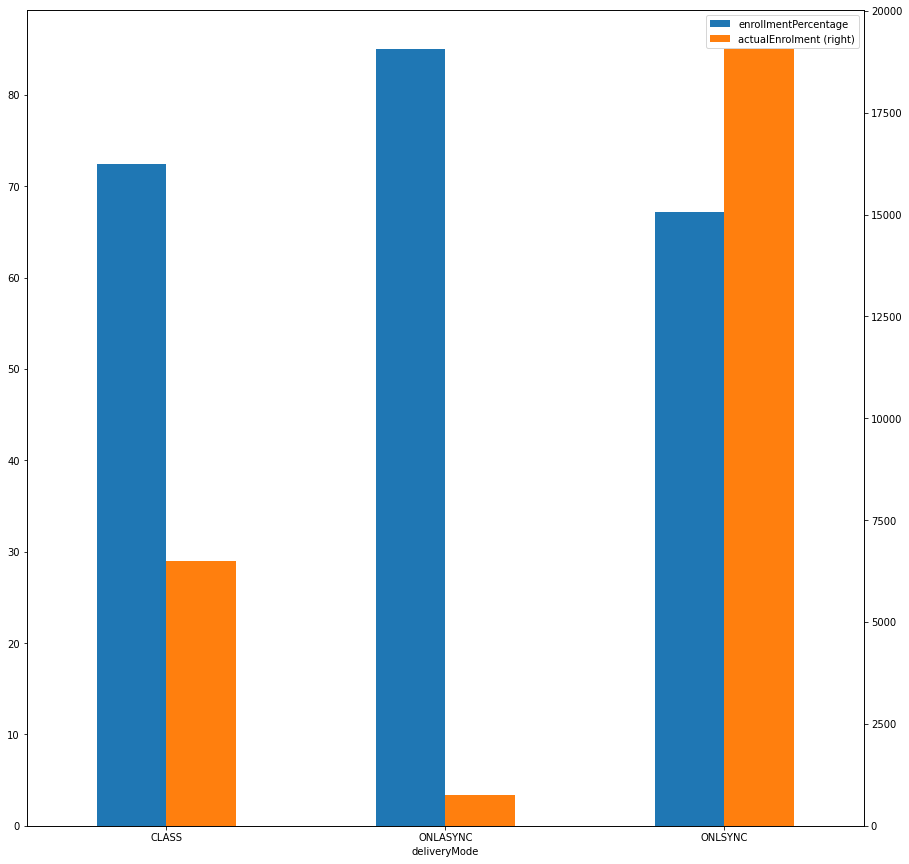

In [188]:
plot(priority_enrollments)

<AxesSubplot:xlabel='deliveryMode'>

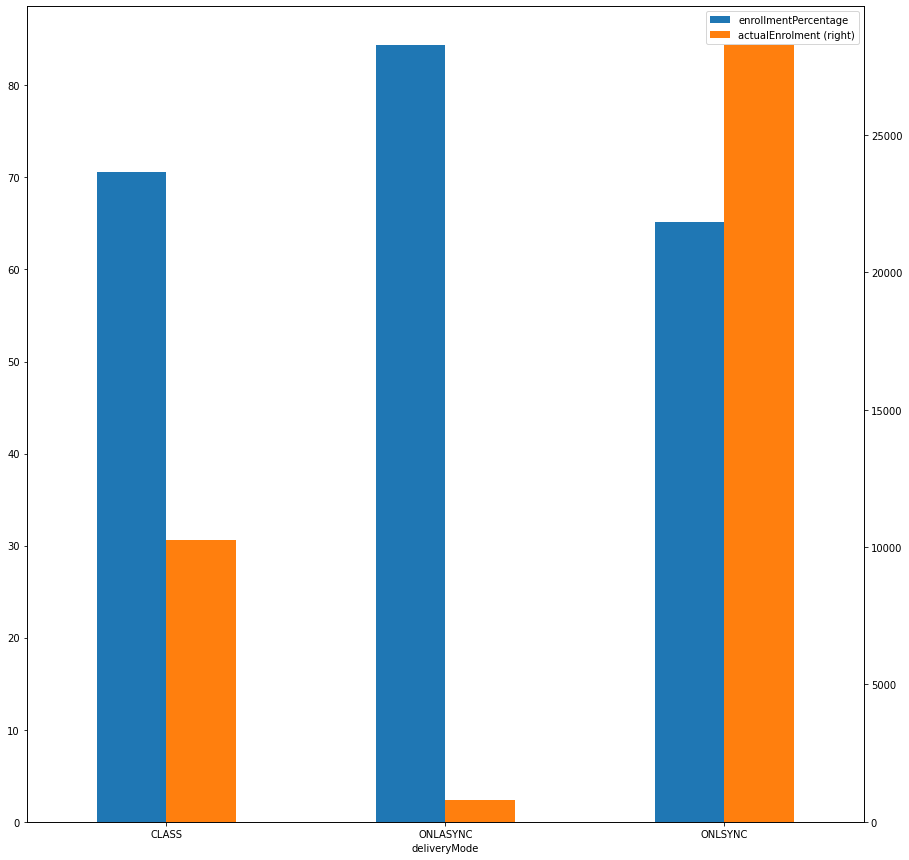

In [190]:
plot(enrollments_with_multiple_modes)